# Explore the In Class Survey

During the first class, you filled out the [first-day survey](https://docs.google.com/forms/d/e/1FAIpQLSczqKwzkye0RP8byLMxzj1Br3kC_YUdVGLWmMXX6VND99ivWg/viewform). In this lab, you will explore [the responses](https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit?usp=sharing).

Download the spreadsheet from the link above, then read the data into a `pandas` `DataFrame` whose columns are the survey questions. Each row represents one student's response to the questions.

In [ ]:
import pandas as pd

## Question 1

Make a graphic that visualizes the favorite colors of students in DATA 301. Explain what you see.

(_Hint:_ You might have to clean the data a bit first.)

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit#gid=970845822'
url1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
students = pd.read_csv(url1)
students.columns = ['major', 'living', 'sibs', 'color', 'entertainment', 'golfballs', 'sports', 'gamer', 'artistic']
students['golfballs'] = students['golfballs'].astype(int)

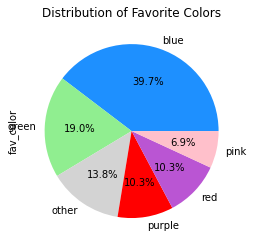

In [ ]:
cols = ['blue', 'red', 'pink', 'green', 'purple']

def color_coder(c):
    for color in cols:
        if color in c.lower():
            return color.lower()
    else:
        return 'other'

students['fav_color'] = students['color'].map(color_coder)
students['fav_color'].value_counts(normalize=True).plot.pie(title='Distribution of Favorite Colors',autopct='%1.1f%%', colors = ['dodgerblue', 'lightgreen', 'lightgrey', 'red', 'mediumorchid', 'pink'])

Blue was the most popular color picked, followed by green. Red, pink, and purple were similar in popularity and colors such as orange, black, grey, and uncommon colors were grouped together since they only got one or two votes.

## Question 2

Is there a relationship between the number of siblings a student has, and whether or not they live in SLO?

Make a visualization to address this question, and discuss the result.

in_slo,no,yes
sibs,,
0,0.80,0.20
1,0.36,0.64
2,0.35,0.65
3,0.60,0.40
5,1.00,0.00


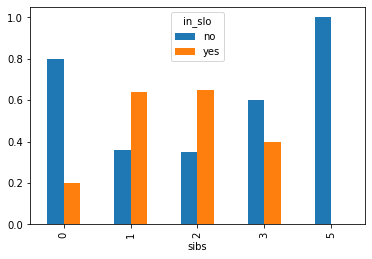

In [ ]:
students["in_slo"] = students["living"].map({
    "Off Campus, but in SLO": "yes",
    "Off Campus, outside of SLO": "no",
    "On-Campus housing": "yes"
})

joint_siblings_slo = pd.crosstab(students['sibs'], students['in_slo'], normalize=True)
siblings = joint_siblings_slo.sum(axis=1)

# P(location|siblings) - conditional distribution of where they live given how many siblings they have
cond_siblings_location = joint_siblings_slo.divide(siblings, axis=0)
cond_siblings_location.plot.bar()
cond_siblings_location

There does seem to be a relationship between number of siblings and whether a person is living in SLO because the marginal probability distributions for number of siblings are different depending on whether a student resides in SLO or not.

## Question 3

You were asked to guess how many golf balls fit into a standard-sized school bus.  This is actually a famous Google interview question!  The best answer I could find online is [here](https://www.quora.com/How-many-golf-balls-can-fit-into-a-school-bus).

How did the different subgroups in the class do on this question?  That is, can you find an interesting relationship between the golf ball numbers guess and any of the other variables in this dataset?

(_Hint:_ There are many reasonable approaches to this problem. You will get full credit for any reasonable approach, as long as you carefully justify it.)

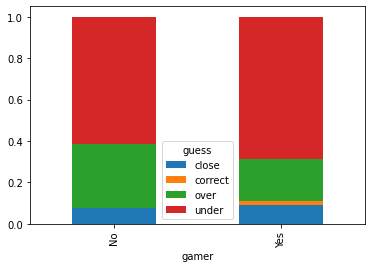

In [ ]:
def golf_to_guess(c):
  num = int(c)
  if num == 660000:
    return "correct"
  elif num > 600000 and num < 700000:
    return "close"
  elif int(c) > 700000:
    return "over"
  else:
    return "under"

# Categorize all the different guesses into categories
students['guess'] = students['golfballs'].map(golf_to_guess)

# Joint distribution between the guess and whether student likes video games
joint_games_guess = pd.crosstab(students['gamer'], students['guess'], normalize=True)
video_games = joint_games_guess.sum(axis=1)

# P(guess|video games) - conditional distribution of their golf ball guess given whether they enjoy video games or not.
cond_games_guess = joint_games_guess.divide(video_games, axis=0)
cond_games_guess.plot.bar(stacked=True)

Before comparing the guesses to other variables, we decided to categorize the guess under a category: correct, close, over, under. This made things easy for us to visualize and compare to other variables.

We found an interesting relationship between video games and the golf balls guess. Primarily because there was a correct answer and more close guesses for those who enjoyed video games compared to those that did not. Part of the reason could be that video games pose people to questions or puzzles similar to this golf ball question so it appears that those who enjoy video games are more likely to answer a question like this correctly. 

Another interesting relationship between these two variables is how many students who enjoy video games under guessed the golf ball question. Another aspect that video games bring to the table is the idea of risk/reward. As you play a game, you have to factor in the risk to reward ratio to make a particular decision that may bring you to victory. So in the case of this question, it appears those who enjoy video games are more likely to lower their risk by under guessing the number of golf balls needed to fill a school bus.

## Question 4

Is there a relationship between a students favorite color, and whether or not they consider themselves artistic?

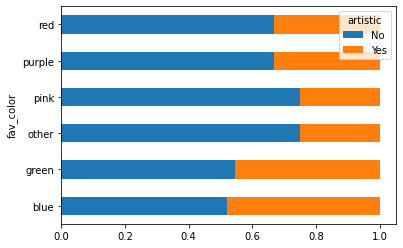

In [ ]:
joint_color_artistic = pd.crosstab(students['fav_color'], students['artistic'], normalize=True)
artistic = joint_color_artistic.sum(axis=1)

# P(color|artistic) - conditional distribution of their favorite color given whether they consider themselves artistic or not.
cond_color_artistic = joint_color_artistic.divide(artistic, axis=0)
cond_color_artistic.plot(stacked=True, mark_right=True, kind='barh')

In [ ]:
cond_color_artistic

artistic,No,Yes
fav_color,,
blue,0.521739,0.478261
green,0.545455,0.454545
other,0.750000,0.250000
pink,0.750000,0.250000
purple,0.666667,0.333333
red,0.666667,0.333333


There may be a relationship present between favorite color and whether or not someone is artistic. People whose favorite colors were blue and green considered themselves artistic around 45-47% of the time, while people who liked pink and other colors only considered themselves artistic 25% of the time. This difference seems to be fairly significant, but more statistical analyses need to be performed to be certain.